In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from rdkit import Chem
from rdkit.Chem import Descriptors
# pd.set_option('display.max_rows', None)

In [2]:
# h298_df = pd.read_csv('tests/data/gdb11_0.001.csv')
h298_df = pd.read_csv('tests/data/gdb11_0.01.csv')
h298_df.describe()

,h298
count,71161.000000
mean,-1.357522
std,59.770424
min,-343.774000
25%,-40.303000
50%,0.903000
75%,40.292000
max,253.086000


In [3]:
# calculate statistics for molecular weight of smiles in h298_df using Descriptors.ExactMolWt()
h298_df['MW'] = h298_df['smiles'].apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x)))
h298_df['MW'].describe()

count    71161.000000
mean       150.845469
std          7.529037
min         72.021129
25%        149.120449
50%        153.078979
75%        155.131014
max        174.050379
Name: MW, dtype: float64

In [4]:
# specify the root directory
root_dir = 'results'

dfs = []

# iterate over the directories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        
        # specify important files in the subdirectory
        json_path = os.path.join(subdir_path, "args.json")
        csv_path = os.path.join(subdir_path, "test_metrics.csv")
        
        # read in args.json
        with open(json_path, 'r') as f:
            json_data = json.load(f)
        json_df = pd.DataFrame({k:[v] for k, v in json_data.items()})
        
        # read in test_metrics.csv
        try:
            csv_df = pd.read_csv(csv_path)
        except FileNotFoundError:  # if job didn't finish, there'll be no CSV
            continue
        
        # concatentate horizontally
        df = pd.DataFrame({"directory": [subdir]})
        df = pd.concat([df, json_df, csv_df], axis=1)
        dfs.append(df)
                    
# combine the data into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
df.drop(columns=['hf_col_name', 'lf_col_name', 'save_test_plot', 
                 'num_epochs', 'export_train_and_val', 'scale_data',
                 'results_dir'], inplace=True)

# df = df[df['split_type'] == 'random']
# df = df[df['split_type'] == 'scaffold']
# df = df[df['split_type'] == 'h298']

df = df[df['model_type'] == 'single_fidelity']

df['data_file'] = df['data_file'].apply(lambda x: float(x.split('/')[-1].split('_')[-1][:-4]))

df.sort_values(by=['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf', 'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio'])

,directory,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,split_type,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
25,2023-10-28_18-59-27.084601,single_fidelity,0.00001,0,0.0,0.0,0.0,molwt,1,True,0,59.998630,67.628252,0.043895,NaN,NaN,NaN
74,2023-10-28_19-02-59.877834,single_fidelity,0.00001,0,0.0,0.0,0.0,random,1,True,1,59.240739,67.946746,-0.024293,NaN,NaN,NaN
246,2023-10-28_19-10-33.817538,single_fidelity,0.00001,0,0.0,0.0,0.0,atom,1,True,1,9.720516,9.720656,-0.135314,NaN,NaN,NaN
289,2023-10-28_18-58-08.682450,single_fidelity,0.00001,0,0.0,0.0,0.0,molwt,1,True,2,59.649518,66.754365,0.068444,NaN,NaN,NaN
337,2023-10-28_19-13-14.754817,single_fidelity,0.00001,0,0.0,0.0,0.0,random,1,True,2,39.452295,45.286388,0.204864,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2023-10-30_07-09-25.480810,single_fidelity,1.00000,0,0.0,0.0,0.0,atom,1,True,0,31.117480,32.532759,0.712686,NaN,NaN,NaN
981,2023-10-29_06-02-56.006176,single_fidelity,1.00000,0,0.0,0.0,0.0,atom,1,True,0,31.566583,32.937362,0.705496,NaN,NaN,NaN
1054,2023-10-28_18-53-40.351359,single_fidelity,1.00000,0,0.0,0.0,0.0,molwt,1,True,0,38.867598,41.235314,0.578895,NaN,NaN,NaN
1521,2023-10-30_19-55-06.217876,single_fidelity,1.00000,0,0.0,0.0,0.0,atom,1,True,0,33.248278,34.699163,0.673147,NaN,NaN,NaN


In [5]:
df_mean = df.drop(columns=['directory']).groupby(['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).mean().reset_index()
df_std = df.drop(columns=['directory']).groupby(['model_type', 'data_file', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf', 'split_type']).std().reset_index()

In [6]:
df_mean

,model_type,data_file,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,split_type,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
0,single_fidelity,0.00001,0,0.0,0.0,0.0,1,True,atom,1.000000,9.733209,9.782391,-0.149999,NaN,NaN,NaN
1,single_fidelity,0.00001,0,0.0,0.0,0.0,1,True,h298,1.000000,33.066172,41.247003,0.020151,NaN,NaN,NaN
2,single_fidelity,0.00001,0,0.0,0.0,0.0,1,True,molwt,1.000000,60.324348,67.665714,0.042764,NaN,NaN,NaN
3,single_fidelity,0.00001,0,0.0,0.0,0.0,1,True,random,1.000000,49.035254,57.929458,0.129077,NaN,NaN,NaN
4,single_fidelity,0.00001,0,0.0,0.0,0.0,1,True,scaffold,1.000000,54.098133,66.981002,0.185837,NaN,NaN,NaN
5,single_fidelity,0.00010,0,0.0,0.0,0.0,1,True,atom,1.000000,13.726051,16.590316,0.903233,NaN,NaN,NaN
6,single_fidelity,0.00010,0,0.0,0.0,0.0,1,True,h298,1.000000,52.001534,56.809046,-1.535842,NaN,NaN,NaN
7,single_fidelity,0.00010,0,0.0,0.0,0.0,1,True,molwt,1.000000,32.785039,38.935279,0.639797,NaN,NaN,NaN
8,single_fidelity,0.00010,0,0.0,0.0,0.0,1,True,random,1.000000,14.686113,17.868928,0.885180,NaN,NaN,NaN
9,single_fidelity,0.00010,0,0.0,0.0,0.0,1,True,scaffold,1.000000,13.653238,17.503625,0.870669,NaN,NaN,NaN


In [7]:
df_mean.split_type.value_counts()

split_type
atom        6
molwt       6
random      6
h298        5
scaffold    5
Name: count, dtype: int64

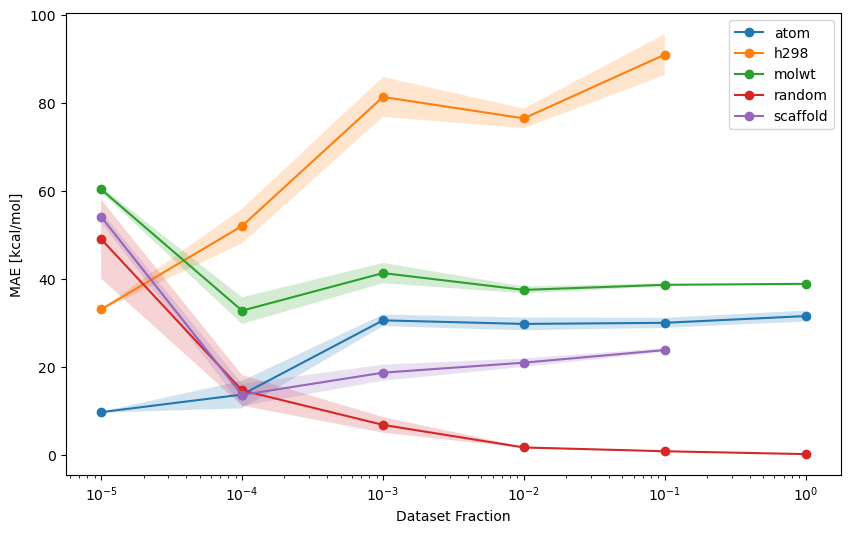

In [8]:
# plot the MAE as a function of datasest fraction for the different split types
fig, ax = plt.subplots(figsize=(10, 6))
for split_type in df_mean.split_type.unique():
    plt.semilogx(df_mean[df_mean['split_type'] == split_type]['data_file'], df_mean[df_mean['split_type'] == split_type]['MAE_hf'], label=split_type, marker='o')
    plt.fill_between(df_mean[df_mean['split_type'] == split_type]['data_file'], 
                     df_mean[df_mean['split_type'] == split_type]['MAE_hf'] - df_std[df_std['split_type'] == split_type]['MAE_hf'], 
                     df_mean[df_mean['split_type'] == split_type]['MAE_hf'] + df_std[df_std['split_type'] == split_type]['MAE_hf'], alpha=0.2)
plt.legend()
plt.xlabel('Dataset Fraction')
plt.ylabel('MAE [kcal/mol]')
# plt.savefig('MAE_vs_dataset_size.png', dpi=300)
plt.show()

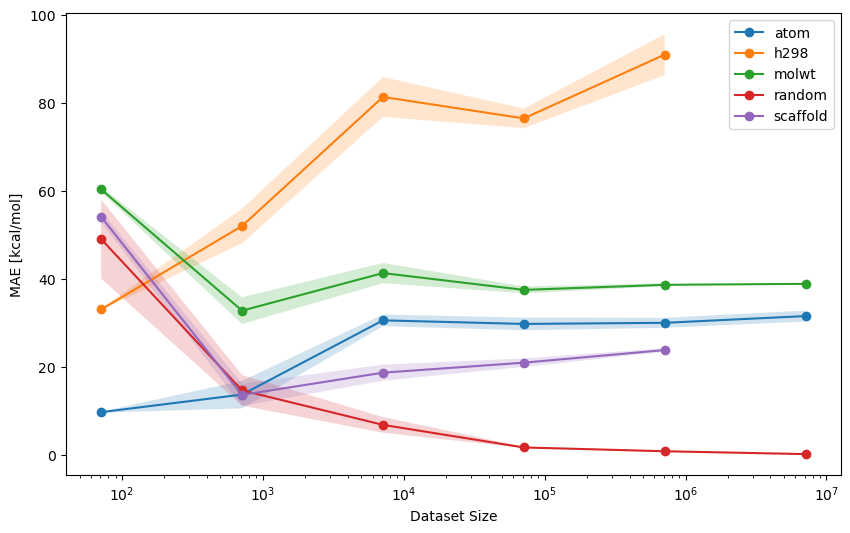

In [9]:
# plot the MAE as a function of datasest size for the different split types
fig, ax = plt.subplots(figsize=(10, 6))
for split_type in df_mean.split_type.unique():
    plt.semilogx(df_mean[df_mean['split_type'] == split_type]['data_file']*7116134, df_mean[df_mean['split_type'] == split_type]['MAE_hf'], label=split_type, marker='o')
    plt.fill_between(df_mean[df_mean['split_type'] == split_type]['data_file']*7116134, 
                     df_mean[df_mean['split_type'] == split_type]['MAE_hf'] - df_std[df_std['split_type'] == split_type]['MAE_hf'], 
                     df_mean[df_mean['split_type'] == split_type]['MAE_hf'] + df_std[df_std['split_type'] == split_type]['MAE_hf'], alpha=0.2)
plt.legend()
plt.xlabel('Dataset Size')
plt.ylabel('MAE [kcal/mol]')
# plt.savefig('MAE_vs_dataset_size.png', dpi=300)
plt.show()